<a href="https://colab.research.google.com/github/GaneshKannanOfficial/BitcoinPrice_Prediction/blob/main/BitCoin_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import yfinance as yf

In [26]:
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [27]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-09-14,26228.277344,26774.623047,26171.451172,26539.673828,26539.673828,13811359124
2023-09-15,26533.818359,26840.498047,26240.701172,26608.693359,26608.693359,11479735788
2023-09-16,26606.199219,26754.769531,26473.890625,26568.281250,26568.281250,7402031417


In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

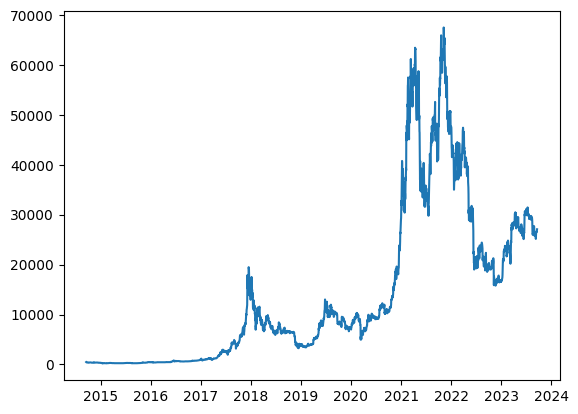

In [29]:
plt.plot(df.index,df['Adj Close'])

In [30]:
model = RandomForestRegressor()

In [31]:
x = df[['Open','High','Low','Volume']]
y = df['Adj Close']

In [32]:
y=np.array(y)
y

array([  457.33401489,   424.44000244,   394.79598999, ...,
       26568.28125   , 26534.1875    , 27097.26953125])

In [33]:
row = int(len(x)*0.9)
x_train = x[:row]
x_test = x[row:]
y_train = y[:row]
y_test = y[row:]

In [34]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
y_pred = model.predict(x_test)

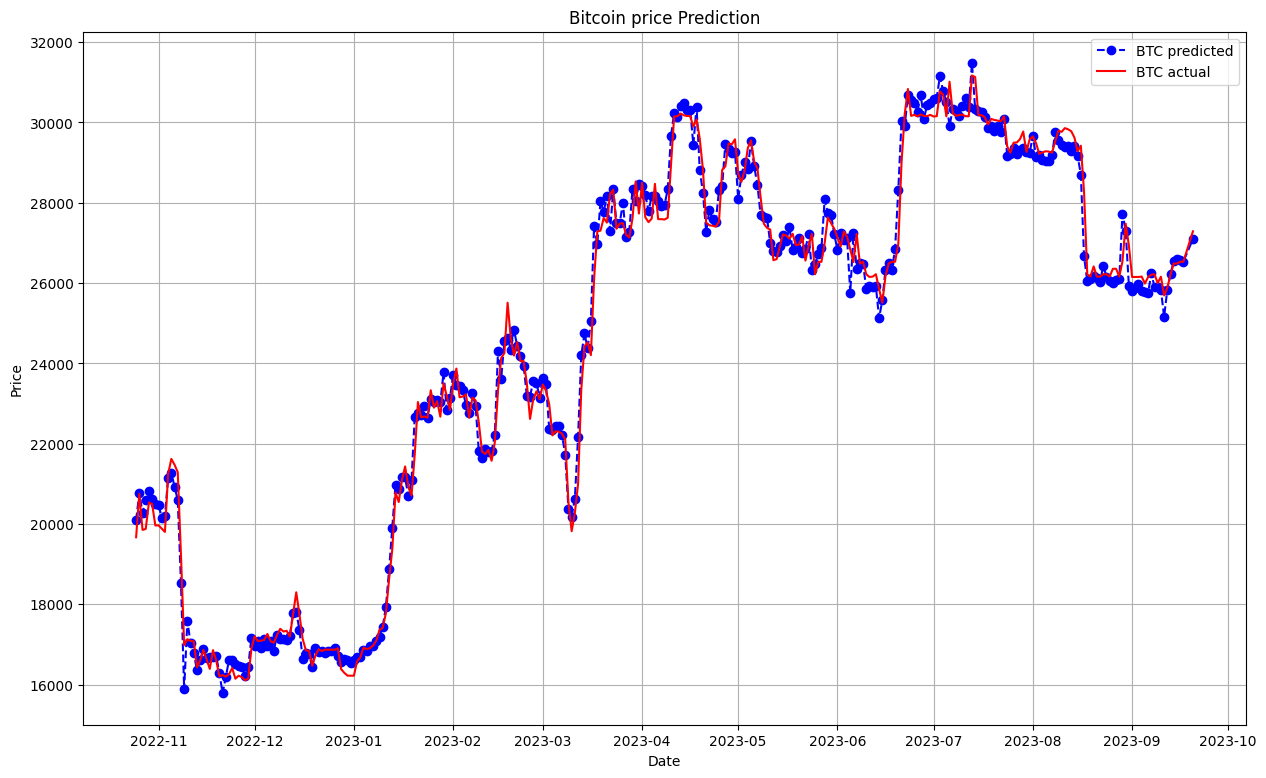

In [43]:
plt.figure(figsize = (15,9))
plt.grid(True)
plt.plot(df.index[row:],y_test,color='b',marker='o',linestyle='dashed',label = 'BTC predicted')
plt.plot(df.index[row:],y_pred,color='r',label = 'BTC actual')
plt.title('Bitcoin price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import mean_absolute_percentage_error
acc = mean_absolute_percentage_error(y_test,y_pred)
(1-acc)*100

98.7921010428164